In [1]:
# Importing required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as skl
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, metrics
import graphviz

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, cross_validate, GridSearchCV
from sklearn import feature_selection, model_selection, metrics

import matplotlib as mpl
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

#### Getting Training and Testing data

In [2]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
full_data_df = pd.concat([train_df, test_df], axis = 0)

In [3]:
full_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
full_data_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
full_data_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


We are retaining the indexes in the above concat operation to identify the train and test data and apply the feature engineering.

**Let us now find the correlation between the features**

In [6]:
train_df['Survived'].corr(train_df['Age'])

-0.07722109457217764

In [7]:
train_df['Pclass'].corr(train_df['Fare'])

-0.5494996199439077

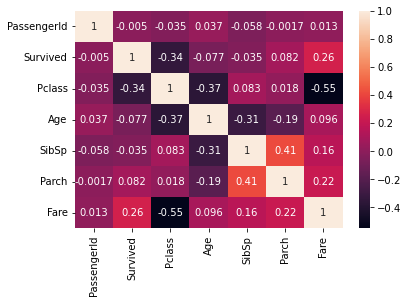

In [8]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

####  Description to the above correlation matrix

Here with the above correlation matrix we can deduce that the Sibsp and Parch have strong positive correlation. This is because parents travel with the children and childrens might have siblings.
Also, Pclass and Fare have strong negative correlation. This is because First class tickets are more expensive than the third class tickets.

**We have many titles like Mlle, Col, Mme etc., Let us replace all the titles with some generic titles like Dr, Master, Miss, Mr, Mrs, Rev**

In [9]:
full_data_df['Title'] = full_data_df['Name']
for name_str in full_data_df['Name']:
    full_data_df['Title'] = full_data_df['Name'].str.extract('([A-Za-z]+)\.', expand = True)

map_titles = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 
              'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss', 
              'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 
              'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
full_data_df.replace({'Title': map_titles}, inplace = True)
required_titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in required_titles:
    age_to_assign = full_data_df.groupby('Title')['Age'].median()[required_titles.index(title)]
    full_data_df.loc[(full_data_df['Age'].isnull()) & (full_data_df['Title'] == title), 'Age'] = age_to_assign
    
# let us now substitute Age values in train_df, test_df
train_df['Age'] = full_data_df['Age'][:891]
test_df['Age'] = full_data_df['Age'][891:]

# We no longer need Title feature in full_data_df. So lets drop it.
full_data_df.drop('Title', axis = 1, inplace = True)

**Engineering a new feature total family size from the existing features sibsp and parch**

In [10]:
full_data_df['Total_Family_Size'] = full_data_df['Parch'] + full_data_df['SibSp']

# Substitue the values of the new feature Total_Family_Size in the train_df and test_df
train_df['Total_Family_Size'] = full_data_df['Total_Family_Size'][:891]
test_df['Total_Family_Size'] = full_data_df['Total_Family_Size'][891:]

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


**Let us now use the Last Name from the Name feature since we can establish a correlation between survial chances and Family Size**

In [12]:
full_data_df['Last_Name'] = full_data_df['Name'].apply(lambda x: str.split(x, ",")[0])
full_data_df['Fare'].fillna(full_data_df['Fare'].mean(), inplace=True)

# Since, the minimum chances of survival is 50%, we will conside the default survival rate as 0.5
default_survival_rate = 0.5
full_data_df['Family_Survival_Chances'] = default_survival_rate

for grp, group_df in full_data_df[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):
    
    if (len(group_df) != 1):
        for ind, row in group_df.iterrows():
            smax = group_df.drop(ind)['Survived'].max()
            smin = group_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                full_data_df.loc[full_data_df['PassengerId'] == passID, 'Family_Survival_Chances'] = 1
            elif (smin==0.0):
                full_data_df.loc[full_data_df['PassengerId'] == passID, 'Family_Survival_Chances'] = 0

print("No.of passengers with information about family survival chances:", 
      full_data_df.loc[full_data_df['Family_Survival_Chances']!=0.5].shape[0])

No.of passengers with information about family survival chances: 420


In [13]:
for _, group_df in full_data_df.groupby('Ticket'):
    if (len(group_df) != 1):
        for ind, row in group_df.iterrows():
            if (row['Family_Survival_Chances'] == 0) | (row['Family_Survival_Chances']== 0.5):
                smax = group_df.drop(ind)['Survived'].max()
                smin = group_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    full_data_df.loc[full_data_df['PassengerId'] == passID, 'Family_Survival_Chances'] = 1
                elif (smin==0.0):
                    full_data_df.loc[full_data_df['PassengerId'] == passID, 'Family_Survival_Chances'] = 0
                        
print("No.of passengers with family/group survival chances information: " 
      +str(full_data_df[full_data_df['Family_Survival_Chances']!=0.5].shape[0]))

# # Substituing Family_Survival_Chances feature in train_df and test_df:
train_df['Family_Survival_Chances'] = full_data_df['Family_Survival_Chances'][:891]
test_df['Family_Survival_Chances'] = full_data_df['Family_Survival_Chances'][891:]

No.of passengers with family/group survival chances information: 546


**Filling missing values in Fare columns and doing basic encoding on the feature**

In [14]:
full_data_df['Fare'].fillna(full_data_df['Fare'].median(), inplace = True)
full_data_df['FareBin'] = pd.qcut(full_data_df['Fare'], 5)

label = LabelEncoder()
full_data_df['FareBin_Code'] = label.fit_transform(full_data_df['FareBin'])

train_df['FareBin_Code'] = full_data_df['FareBin_Code'][:891]
test_df['FareBin_Code'] = full_data_df['FareBin_Code'][891:]

train_df.drop(['Fare'], axis = 1, inplace=True)
test_df.drop(['Fare'], axis = 1, inplace=True)

**Doing basic encoding on the Age feature**

In [15]:
full_data_df['AgeBin'] = pd.qcut(full_data_df['Age'], 4)

label = LabelEncoder()
full_data_df['AgeBin_Code'] = label.fit_transform(full_data_df['AgeBin'])

train_df['AgeBin_Code'] = full_data_df['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = full_data_df['AgeBin_Code'][891:]

train_df.drop(['Age'], axis = 1, inplace=True)
test_df.drop(['Age'], axis = 1, inplace=True)

**Replacing Male & Female with binary values(0s and 1s)**

In [16]:
genders = {"male": 1, "female": 0}
train_data = [train_df]
test_data = [test_df]

for dataset in train_data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
for dataset in test_data:
    dataset['Sex'] = dataset['Sex'].map(genders)

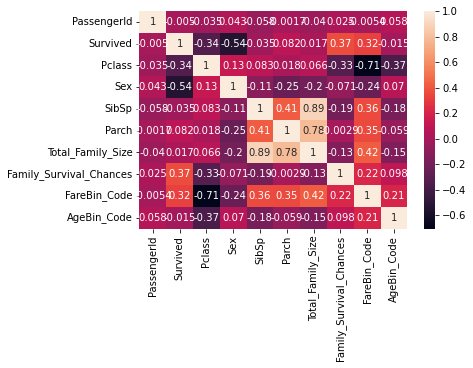

In [17]:
sns.heatmap(train_df.corr(), annot=True)
plt.show()

 **Dropping some features Name, PassengerId, SibSp, Parch, Ticket, Cabin, Embarked which are used in the previous feature engineering steps**

In [18]:
train_df.drop(['Name', 'PassengerId','SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [19]:
train_df.head(5)

,Survived,Pclass,Sex,Total_Family_Size,Family_Survival_Chances,FareBin_Code,AgeBin_Code
0,0,3,1,1,0.5,0,0
1,1,1,0,1,0.5,4,3
2,1,3,0,0,0.5,1,1
3,1,1,0,1,0.0,4,2
4,0,3,1,0,0.5,1,2


In [20]:
Y_train = train_df["Survived"]
X_train = train_df.drop(labels = ["Survived"],axis = 1)
Test = test_df
print(f"X_train shape = {X_train.shape}" )
print(f"Y_train shape = {Y_train.shape}" )
print(f"Test shape = {Test.shape}" )

X_train shape = (891, 6)
Y_train shape = (891,)
Test shape = (418, 6)


In [21]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
X_test = test_df.copy()

**Scaling the data to make it ready for modelling**

In [22]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

### **Modelling**
**Decision Tree**

In [23]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

89.23

### **Plot Decicion Tree**

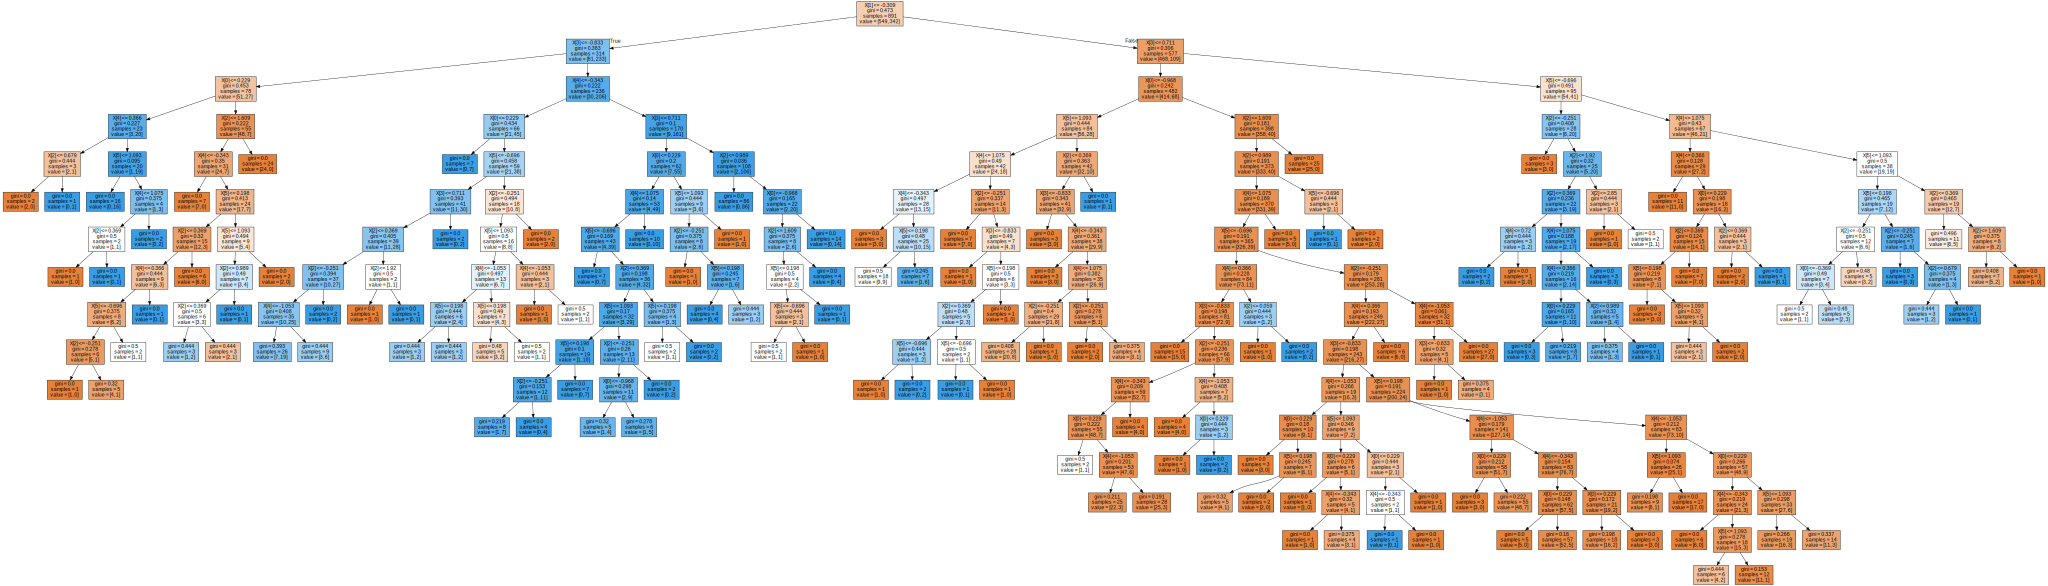

In [34]:
data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(data, format="png") 
graph

### **Apply Five-Fold Cross Validation on Decision Tree Model**

In [49]:
# Five-Fold Cross Validation on the Decision Tree Model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100, "%")

Scores: [0.79888268 0.79775281 0.84269663 0.82022472 0.84831461]
Mean: 0.8215742891218379
Standard Deviation: 0.02119146595151196
Average Classification Accuracy: 82.16 %


### **Modelling**
**Random Forest**

In [39]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(X_test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

89.23

### **Apply Five-Fold Cross Validation on Random Forest Model**

In [48]:
# Five-Fold Cross Validation on the Random Forest Model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, Y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
print("Average Classification Accuracy:", round(scores.mean(),4)*100, "%")

Scores: [0.82681564 0.80337079 0.86516854 0.82022472 0.85393258]
Mean: 0.8339024543343168
Standard Deviation: 0.022575474565635526
Average Classification Accuracy: 83.39 %


In [ ]:
# knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', metric_params=None, 
#                            n_jobs=1, n_neighbors=6, p=2, weights='uniform')
# knn.fit(X, y)
# y_pred = knn.predict(X_test)

# knn_accuracy = round(knn.score(X, y) * 100, 2)
# knn_accuracy

In [ ]:
# submission = pd.DataFrame(pd.read_csv("../input/test.csv")['PassengerId'])
# submission['Survived'] = y_pred
# submission.to_csv("../input/submission-knn-final.csv", index = False)